

```
`# This is formatted as code`

---


```

## Data Information

**p_recall** - proportion of exercises from this lesson/practice where the word/lexeme was correctly recalled

**timestamp** - UNIX timestamp of the current lesson/practice

**delta** - time (in seconds) since the last lesson/practice that included this word/lexeme

**user_id** - student user ID who did the lesson/practice (anonymized)

**learning_language** - language being learned

**ui_language** - user interface language (presumably native to the student)

**lexeme_id** - system ID for the lexeme tag (i.e., word)

**lexeme_string** - lexeme tag (see below)

**history_seen** - total times user has seen the word/lexeme prior to this lesson/practice

**history_correct** - total times user has been correct for the word/lexeme prior to this lesson/practice

**session_seen** - times the user saw the word/lexeme during this lesson/practice

**session_correct** - times the user got the word/lexeme correct during this lesson/practice


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import math
import joblib
from sklearn import metrics
sns.set_style('darkgrid')

DAY_SECONDS = 60 * 60 * 24

In [3]:
result_hlr_papper = pd.read_csv('/content/drive/My Drive/Data/results/hlr.data_with_en.preds', delimiter='\t')
weight_hlr_papper = pd.read_csv('/content/drive/My Drive/Data/results/hlr.data_with_en.weights', delimiter='\t')

In [4]:
result_hlr_papper.head()

,p,pp,h,hh,lang,user_id,timestamp
0,0.9999,0.9382,274.0000,108.8892,it->en,u:g7Or,1363014225
1,0.5000,0.9999,0.0104,107.6496,it->en,u:g7Or,1363014225
2,0.9999,0.9355,274.0000,104.3071,it->en,u:g7Or,1363014225
3,0.9999,0.9511,274.0000,138.6370,it->en,u:g7Or,1363014225
4,0.9999,0.9999,12.5145,110.6734,it->en,u:g7Or,1363014225


In [5]:
result_hlr_papper.loc[result_hlr_papper.p < 0.2].head()

,p,pp,h,hh,lang,user_id,timestamp
5,0.0001,0.9393,0.7549,110.9448,it->en,u:g7Or,1363014225
12,0.0001,0.9999,0.0104,189.7965,es->en,u:h4kH,1363014232
13,0.0001,0.9616,0.5106,120.0545,es->en,u:h4kH,1363014232
17,0.0001,0.9999,0.0104,123.1108,es->en,u:h4kH,1363014232
18,0.0001,0.9843,0.2103,122.0520,es->en,u:h4kH,1363014232


In [6]:
print('Mean Absolute Error:', metrics.mean_absolute_error(result_hlr_papper.p, result_hlr_papper.pp))  
print('Mean Squared Error:', metrics.mean_squared_error(result_hlr_papper.p, result_hlr_papper.pp))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(result_hlr_papper.p, result_hlr_papper.pp)))

Mean Absolute Error: 0.12767905479779854
Mean Squared Error: 0.0835462286345218
Root Mean Squared Error: 0.28904364486098255


In [7]:
print('Mean Absolute Error:', metrics.mean_absolute_error(result_hlr_papper.h, result_hlr_papper.hh))  
print('Mean Squared Error:', metrics.mean_squared_error(result_hlr_papper.h, result_hlr_papper.hh))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(result_hlr_papper.h, result_hlr_papper.hh)))

Mean Absolute Error: 115.48736676756802
Mean Squared Error: 14592.555667394134
Root Mean Squared Error: 120.79965094069657


In [8]:
weight_hlr_papper.head()

,right,0.0069
0,wrong,-0.1591
1,bias,7.1657
2,en:need/need<vblex><pres>,0.4282
3,en:red/red<adj>,0.0283
4,en:walks/walk<vblex><pri><p3><sg>,0.3765


In [9]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [10]:
data = pd.read_csv("/content/drive/My Drive/Data/settles.acl16.learning_traces.13m.csv")

In [11]:
data.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [12]:
#data.insert(2, "appear_by_lexeme",data.groupby(["user_id", "lexeme_string"])["lexeme_string"].cumcount()+1, True )

In [13]:
#data.loc[(data.user_id == "u:hxsA") & (data.lexeme_id == "a94a938b71c9bd3352c0811cb5f94d72")]

In [14]:
# korespondensi satu-satu
data.groupby('lexeme_id')['lexeme_string'].transform(lambda x:x.nunique()==1).all()

True

In [15]:
# data['p_recall'].mask(data['p_recall'] == 0.1, 0.9999, inplace=True)
# data.head()
# data.insert(1, "half-life",((-1)*data["delta"]/np.log(data["p_recall"])), True )
# data.head()
#data2.insert(2, "delta_days",data2["delta"]/DAY_SECONDS, True )
#data2 = data2.drop("delta", axis=1)

In [16]:
data2 = data.loc[(data.learning_language=="en")]
data2.p_recall.replace([0, 1], [0.01, 0.99], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
data2.head()

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
87,0.99,1362082504,357,u:dwbJ,en,pt,1052c3ace653dbc8923eaa183bc02b88,definition/definition<n><sg>,17,17,2,2
88,0.99,1362082504,357,u:dwbJ,en,pt,9cba1b30f88bf3c047b22cffcaf88c12,surface/surface<n><sg>,19,19,3,3
89,0.99,1362082504,357,u:dwbJ,en,pt,961cd149f20f2571419b1412d849f19a,scale/scale<n><sg>,21,20,3,3
90,0.80,1362082504,357,u:dwbJ,en,pt,5cbb1249562e95794a4c4ae0e2d8ae26,temperature/temperature<n><sg>,44,36,5,4
91,0.99,1362082504,357,u:dwbJ,en,pt,2df65bdf80d10d2b78d62cb2e0a731d8,distance/distance<n><sg>,21,20,3,3


In [18]:
data2 = data2.drop(["user_id","learning_language", "timestamp", "lexeme_id"], axis=1)

In [19]:
data2.insert(2, "delta_days",data2["delta"]/DAY_SECONDS, True )
data2 = data2.drop("delta", axis=1)

In [20]:
data2.head()

,p_recall,delta_days,ui_language,lexeme_string,history_seen,history_correct,session_seen,session_correct
87,0.99,0.004132,pt,definition/definition<n><sg>,17,17,2,2
88,0.99,0.004132,pt,surface/surface<n><sg>,19,19,3,3
89,0.99,0.004132,pt,scale/scale<n><sg>,21,20,3,3
90,0.80,0.004132,pt,temperature/temperature<n><sg>,44,36,5,4
91,0.99,0.004132,pt,distance/distance<n><sg>,21,20,3,3


In [21]:
data2.insert(2, "half_life",((-1)*data2["delta_days"]/np.log(data2["p_recall"])), True )

In [22]:
data2.head()

,p_recall,delta_days,half_life,ui_language,lexeme_string,history_seen,history_correct,session_seen,session_correct
87,0.99,0.004132,0.411125,pt,definition/definition<n><sg>,17,17,2,2
88,0.99,0.004132,0.411125,pt,surface/surface<n><sg>,19,19,3,3
89,0.99,0.004132,0.411125,pt,scale/scale<n><sg>,21,20,3,3
90,0.80,0.004132,0.018517,pt,temperature/temperature<n><sg>,44,36,5,4
91,0.99,0.004132,0.411125,pt,distance/distance<n><sg>,21,20,3,3


In [23]:
data2.loc[data2["half_life"] > 121, ["half_life"]] = 121
data2.loc[data2["half_life"] < 0.01, ["half_life"]] = 0.01

delete lexeme_id and lexeme_string

# **Preprocesing**

### Explore

In [24]:
#trashold?
(len(data2.loc[data2.p_recall>0.9])) / (len(data2.p_recall)) * 100

83.9891831982629

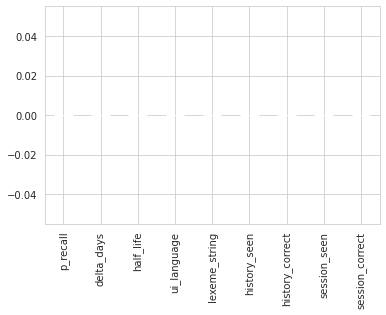

In [25]:
sns.set_style("whitegrid")
missing = data2.isnull().sum()
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [26]:
data2.shape

(5014791, 9)

In [27]:
data2.duplicated().sum()

48483

In [28]:
data2 = data2.drop_duplicates()

In [29]:
data2.shape

(4966308, 9)

In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966308 entries, 87 to 12854225
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   p_recall         float64
 1   delta_days       float64
 2   half_life        float64
 3   ui_language      object 
 4   lexeme_string    object 
 5   history_seen     int64  
 6   history_correct  int64  
 7   session_seen     int64  
 8   session_correct  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 378.9+ MB


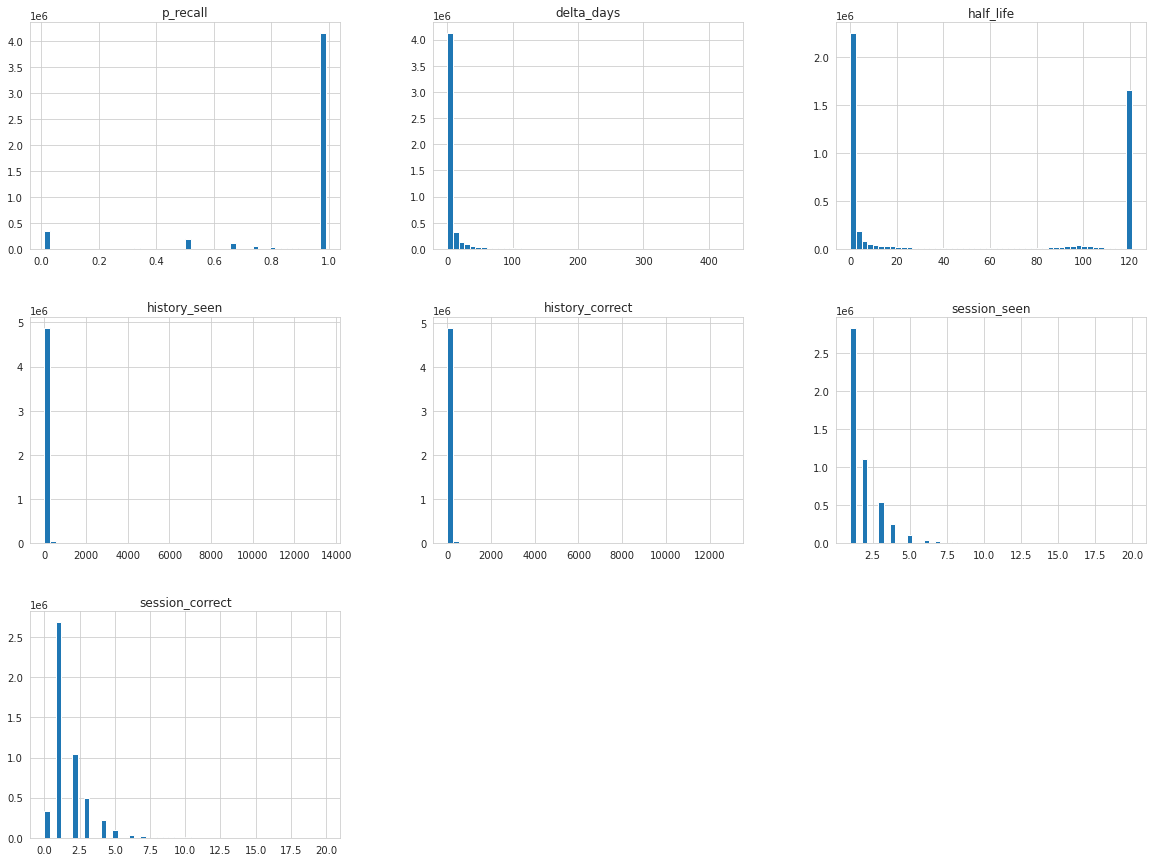

In [31]:
data2.hist(bins=50, figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


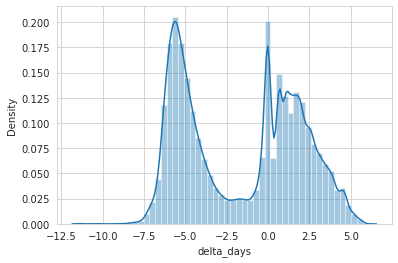

In [32]:
log_resp = np.log(data2.delta_days)
sns.distplot(log_resp)

#### outlier

In [33]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [34]:
def find_iqr(data):
  sort_data = sorted(data)
  q1, q3= np.percentile(sort_data,[25,75])
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr)
  outlier = ((len(data.value_counts() < lower_bound)) | (len(data.value_counts() > upper_bound))) / len(data)
  
  return (lower_bound, upper_bound, outlier)

In [35]:
print(find_iqr(data2.delta_days))
print(find_iqr(data2.history_correct))
print(find_iqr(data2.history_seen))
print(find_iqr(data2.session_correct))
print(find_iqr(data2.session_seen))

(-6.764108796296296, 11.288391203703704, 0.15118091749444457)
(-19.5, 40.5, 0.0009634923971690841)
(-18.5, 41.5, 0.0011874011841392037)
(-0.5, 3.5, 4.228493279111968e-06)
(-0.5, 3.5, 4.027136456297112e-06)


In [36]:
data2.head()

,p_recall,delta_days,half_life,ui_language,lexeme_string,history_seen,history_correct,session_seen,session_correct
87,0.99,0.004132,0.411125,pt,definition/definition<n><sg>,17,17,2,2
88,0.99,0.004132,0.411125,pt,surface/surface<n><sg>,19,19,3,3
89,0.99,0.004132,0.411125,pt,scale/scale<n><sg>,21,20,3,3
90,0.80,0.004132,0.018517,pt,temperature/temperature<n><sg>,44,36,5,4
91,0.99,0.004132,0.411125,pt,distance/distance<n><sg>,21,20,3,3


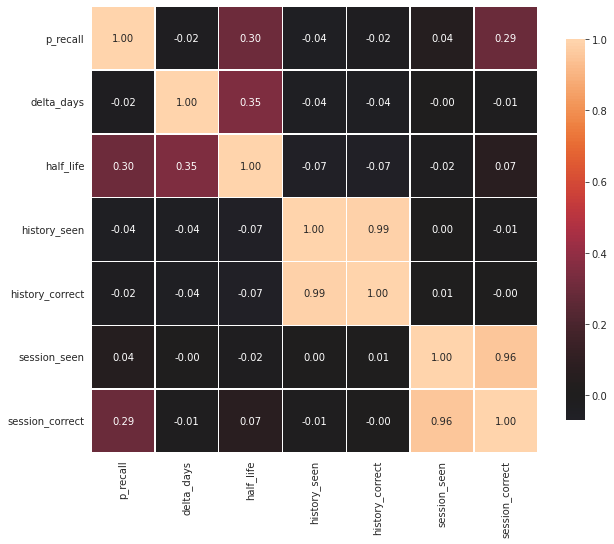

In [37]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(data2)

In [38]:
data3 = data2.copy()
data3.insert(2, "log_delta_days",np.log(data3["delta_days"]), True )
data3.insert(5, "log_history_seen",np.log(data3["history_seen"]), True )
data3.insert(7, "log_history_correct",np.log(data3["history_correct"]), True )
data3.insert(9, "log_session_seen",np.log(data3["session_seen"]), True )
data3.insert(11, "log_session_correct",np.log(data3["session_correct"]), True )

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
data3 = data3.drop(["delta_days","history_seen","history_correct","session_seen"],axis=1)

In [40]:
data3.head()

,p_recall,log_delta_days,half_life,ui_language,log_history_seen,lexeme_string,log_history_correct,log_session_seen,log_session_correct,session_correct
87,0.99,-5.489007,0.411125,pt,2.833213,definition/definition<n><sg>,2.833213,0.693147,0.693147,2
88,0.99,-5.489007,0.411125,pt,2.944439,surface/surface<n><sg>,2.944439,1.098612,1.098612,3
89,0.99,-5.489007,0.411125,pt,3.044522,scale/scale<n><sg>,2.995732,1.098612,1.098612,3
90,0.80,-5.489007,0.018517,pt,3.784190,temperature/temperature<n><sg>,3.583519,1.609438,1.386294,4
91,0.99,-5.489007,0.411125,pt,3.044522,distance/distance<n><sg>,2.995732,1.098612,1.098612,3


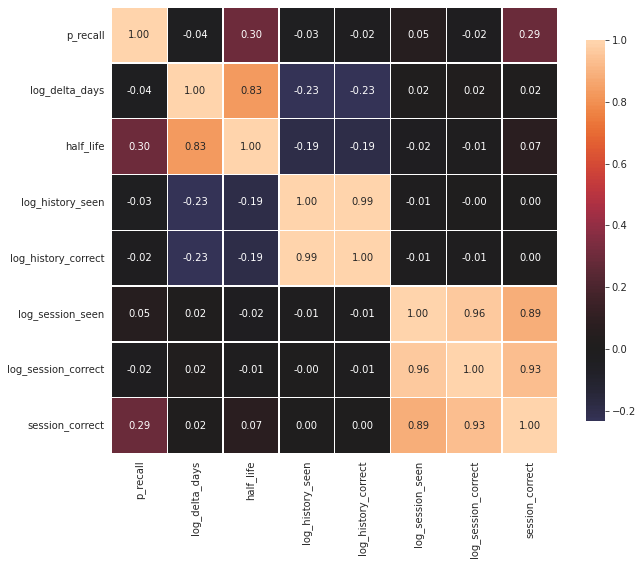

In [41]:
correlation_heatmap(data3)

### split

In [42]:
data2.head()

,p_recall,delta_days,half_life,ui_language,lexeme_string,history_seen,history_correct,session_seen,session_correct
87,0.99,0.004132,0.411125,pt,definition/definition<n><sg>,17,17,2,2
88,0.99,0.004132,0.411125,pt,surface/surface<n><sg>,19,19,3,3
89,0.99,0.004132,0.411125,pt,scale/scale<n><sg>,21,20,3,3
90,0.80,0.004132,0.018517,pt,temperature/temperature<n><sg>,44,36,5,4
91,0.99,0.004132,0.411125,pt,distance/distance<n><sg>,21,20,3,3


In [43]:
y = data2[["p_recall", "half_life"]]
x = data2.drop(["p_recall","half_life"], axis=1)

In [44]:
y.head()

,p_recall,half_life
87,0.99,0.411125
88,0.99,0.411125
89,0.99,0.411125
90,0.80,0.018517
91,0.99,0.411125


In [45]:
x.head()

,delta_days,ui_language,lexeme_string,history_seen,history_correct,session_seen,session_correct
87,0.004132,pt,definition/definition<n><sg>,17,17,2,2
88,0.004132,pt,surface/surface<n><sg>,19,19,3,3
89,0.004132,pt,scale/scale<n><sg>,21,20,3,3
90,0.004132,pt,temperature/temperature<n><sg>,44,36,5,4
91,0.004132,pt,distance/distance<n><sg>,21,20,3,3


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state=1)

In [47]:
print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)

(3724731, 7) (3724731, 2)
(1241577, 7) (1241577, 2)


In [48]:
x_train.head()

,delta_days,ui_language,lexeme_string,history_seen,history_correct,session_seen,session_correct
5209146,1.930012,es,horse/horse<n><sg>,10,9,1,0
12391706,0.129097,es,drink/drink<vblex><pres>,49,45,2,2
8938738,0.037095,es,motorcycle/motorcycle<n><sg>,38,34,1,1
5457519,0.983241,pt,dinner/dinner<n><sg>,4,3,1,1
10650847,3.848681,es,crab/crab<n><sg>,2,1,3,3


In [49]:
y_train.head()

,p_recall,half_life
5209146,0.01,0.419097
12391706,0.99,12.845065
8938738,0.99,3.690912
5457519,0.99,97.831630
10650847,0.99,121.000000


In [50]:
h_train = y_train["half_life"]
h_test = y_test["half_life"]
y_train = y_train["p_recall"]
y_test = y_test["p_recall"]

In [51]:
y_train.head()

5209146     0.01
12391706    0.99
8938738     0.99
5457519     0.99
10650847    0.99
Name: p_recall, dtype: float64

In [52]:
x_train_numerical =  x_train._get_numeric_data() 
x_train_numerical.head()

,delta_days,history_seen,history_correct,session_seen,session_correct
5209146,1.930012,10,9,1,0
12391706,0.129097,49,45,2,2
8938738,0.037095,38,34,1,1
5457519,0.983241,4,3,1,1
10650847,3.848681,2,1,3,3


In [53]:
num = x_train_numerical.columns

In [54]:
joblib.dump(num, 'numerical_col.pkl')

['numerical_col.pkl']

In [55]:
x_train_categorical = x_train.drop(num, axis=1)
x_train_categorical.head()

,ui_language,lexeme_string
5209146,es,horse/horse<n><sg>
12391706,es,drink/drink<vblex><pres>
8938738,es,motorcycle/motorcycle<n><sg>
5457519,pt,dinner/dinner<n><sg>
10650847,es,crab/crab<n><sg>


In [56]:
cat = x_train_categorical.columns

In [57]:
joblib.dump(cat, 'categorical_col.pkl')

['categorical_col.pkl']

## Plot

In [58]:
data_plot = pd.concat([x_train_numerical, x_train_categorical, y_train], axis = 1)
data_plot.head()

,delta_days,history_seen,history_correct,session_seen,session_correct,ui_language,lexeme_string,p_recall
5209146,1.930012,10,9,1,0,es,horse/horse<n><sg>,0.01
12391706,0.129097,49,45,2,2,es,drink/drink<vblex><pres>,0.99
8938738,0.037095,38,34,1,1,es,motorcycle/motorcycle<n><sg>,0.99
5457519,0.983241,4,3,1,1,pt,dinner/dinner<n><sg>,0.99
10650847,3.848681,2,1,3,3,es,crab/crab<n><sg>,0.99


## Feature Scaling

### numerical 

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
standardizer = StandardScaler()

In [61]:
standardizer.fit(x_train_numerical)

StandardScaler()

In [62]:
joblib.dump(standardizer, 'standardizer.pkl')

['standardizer.pkl']

In [63]:
x_train_numerical.head()

,delta_days,history_seen,history_correct,session_seen,session_correct
5209146,1.930012,10,9,1,0
12391706,0.129097,49,45,2,2
8938738,0.037095,38,34,1,1
5457519,0.983241,4,3,1,1
10650847,3.848681,2,1,3,3


In [64]:
x_train_num_std = pd.DataFrame(standardizer.transform(x_train_numerical))
x_train_num_std.head()

,0,1,2,3,4
0,-0.253599,-0.122102,-0.121486,-0.594508,-1.215952
1,-0.333161,0.071237,0.085906,0.103957,0.236090
2,-0.337225,0.016706,0.022536,-0.594508,-0.489931
3,-0.295426,-0.151846,-0.156051,-0.594508,-0.489931
4,-0.168835,-0.161761,-0.167573,0.802422,0.962110


In [65]:
x_train_num_std.columns = x_train_numerical.columns
x_train_num_std.index   = x_train_numerical.index
x_train_num_std.head()

,delta_days,history_seen,history_correct,session_seen,session_correct
5209146,-0.253599,-0.122102,-0.121486,-0.594508,-1.215952
12391706,-0.333161,0.071237,0.085906,0.103957,0.236090
8938738,-0.337225,0.016706,0.022536,-0.594508,-0.489931
5457519,-0.295426,-0.151846,-0.156051,-0.594508,-0.489931
10650847,-0.168835,-0.161761,-0.167573,0.802422,0.962110


### categorical

In [66]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
x_train_categorical_ce = x_train_categorical.copy()

import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [68]:
x_train_categorical.head()

,ui_language,lexeme_string
5209146,es,horse/horse<n><sg>
12391706,es,drink/drink<vblex><pres>
8938738,es,motorcycle/motorcycle<n><sg>
5457519,pt,dinner/dinner<n><sg>
10650847,es,crab/crab<n><sg>


In [69]:
encoder = ce.BinaryEncoder(cols=['ui_language',"lexeme_string"])
df_binary = encoder.fit_transform(x_train_categorical_ce)

df_binary.head()

,ui_language_0,ui_language_1,lexeme_string_0,lexeme_string_1,lexeme_string_2,lexeme_string_3,lexeme_string_4,lexeme_string_5,lexeme_string_6,lexeme_string_7,lexeme_string_8,lexeme_string_9,lexeme_string_10,lexeme_string_11
5209146,0,1,0,0,0,0,0,0,0,0,0,0,0,1
12391706,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8938738,0,1,0,0,0,0,0,0,0,0,0,0,1,1
5457519,1,0,0,0,0,0,0,0,0,0,0,1,0,0
10650847,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [70]:
encoder.get_feature_names()

['ui_language_0',
 'ui_language_1',
 'lexeme_string_0',
 'lexeme_string_1',
 'lexeme_string_2',
 'lexeme_string_3',
 'lexeme_string_4',
 'lexeme_string_5',
 'lexeme_string_6',
 'lexeme_string_7',
 'lexeme_string_8',
 'lexeme_string_9',
 'lexeme_string_10',
 'lexeme_string_11']

In [71]:
df_binary.shape

(3724731, 14)

In [72]:
x_train_categorical.shape

(3724731, 2)

## Join 

In [73]:
x_train_num_std.shape

(3724731, 5)

In [74]:
x_train_clean = pd.concat([x_train_num_std, df_binary], axis=1)

In [75]:
x_train.head()

,delta_days,ui_language,lexeme_string,history_seen,history_correct,session_seen,session_correct
5209146,1.930012,es,horse/horse<n><sg>,10,9,1,0
12391706,0.129097,es,drink/drink<vblex><pres>,49,45,2,2
8938738,0.037095,es,motorcycle/motorcycle<n><sg>,38,34,1,1
5457519,0.983241,pt,dinner/dinner<n><sg>,4,3,1,1
10650847,3.848681,es,crab/crab<n><sg>,2,1,3,3


In [76]:
x_train_clean.head()

,delta_days,history_seen,history_correct,session_seen,session_correct,ui_language_0,ui_language_1,lexeme_string_0,lexeme_string_1,lexeme_string_2,lexeme_string_3,lexeme_string_4,lexeme_string_5,lexeme_string_6,lexeme_string_7,lexeme_string_8,lexeme_string_9,lexeme_string_10,lexeme_string_11
5209146,-0.253599,-0.122102,-0.121486,-0.594508,-1.215952,0,1,0,0,0,0,0,0,0,0,0,0,0,1
12391706,-0.333161,0.071237,0.085906,0.103957,0.236090,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8938738,-0.337225,0.016706,0.022536,-0.594508,-0.489931,0,1,0,0,0,0,0,0,0,0,0,0,1,1
5457519,-0.295426,-0.151846,-0.156051,-0.594508,-0.489931,1,0,0,0,0,0,0,0,0,0,0,1,0,0
10650847,-0.168835,-0.161761,-0.167573,0.802422,0.962110,0,1,0,0,0,0,0,0,0,0,0,1,0,1


## function preprocessing

In [77]:
def preprocessTest(data, numerical_col, categorical_col, standardizer):
    
    # split
    data_numerical   = data[numerical_col]
    data_categorical = data[categorical_col]
    
    # categorical
    data_cat_encoder = encoder.transform(data_categorical)
   
    # numerical
    data_num_std = pd.DataFrame(standardizer.transform(data_numerical))
    data_num_std.columns = data_numerical.columns
    data_num_std.index   = data_numerical.index
     
    # join numerical and categorical (clean)
    data_train_clean = pd.concat([data_num_std, data_cat_encoder], axis=1)
    
    return data_train_clean

In [78]:
x_test_clean = preprocessTest(x_test, num, cat, standardizer)

In [79]:
x_test_clean.head()

,delta_days,history_seen,history_correct,session_seen,session_correct,ui_language_0,ui_language_1,lexeme_string_0,lexeme_string_1,lexeme_string_2,lexeme_string_3,lexeme_string_4,lexeme_string_5,lexeme_string_6,lexeme_string_7,lexeme_string_8,lexeme_string_9,lexeme_string_10,lexeme_string_11
6825072,0.067970,-0.151846,-0.150291,-0.594508,-0.489931,0,1,0,0,0,1,0,0,0,1,0,1,1,1
5311335,-0.301039,0.205087,0.224168,-0.594508,-0.489931,1,1,0,0,0,0,0,0,0,1,0,1,0,0
9050271,-0.287448,0.091067,0.068624,-0.594508,-0.489931,0,1,0,0,0,0,0,1,1,1,0,1,1,1
989326,-0.338611,0.229874,0.212646,0.103957,0.236090,1,0,0,0,0,0,0,0,0,0,1,0,0,0
11035055,-0.337355,-0.146889,-0.144530,-0.594508,-0.489931,1,0,0,0,0,1,0,0,0,0,0,1,1,0


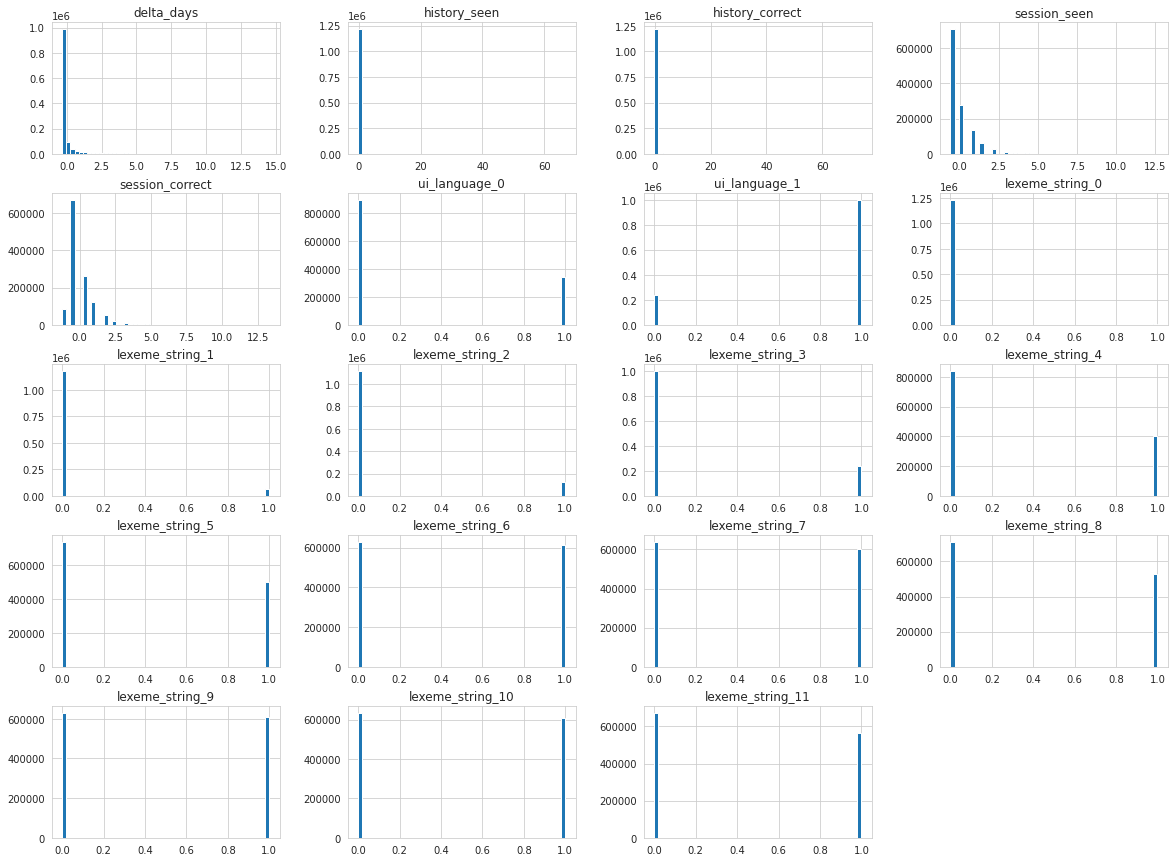

In [80]:
x_test_clean.hist(bins=50, figsize=(20,15))
plt.show()

# **Modeling**

## linear regression

In [81]:
from sklearn.linear_model import LinearRegression
linreg= LinearRegression()
linreg.fit(x_train_clean, y_train)

LinearRegression()

In [82]:
joblib.dump(linreg, 'model_linreg.pkl')

['model_linreg.pkl']

In [83]:
y_pred = linreg.predict(x_test_clean)

In [84]:
linreg.score(x_train_clean,y_train)

0.738600714155064

In [85]:
coeff_linreg = pd.DataFrame(linreg.coef_, x_train_clean.columns, columns=['Coefficient'])  
coeff_linreg

,Coefficient
delta_days,-0.000562
history_seen,-0.008339
history_correct,0.007131
session_seen,-0.724596
session_correct,0.768961
ui_language_0,0.003251
ui_language_1,0.004428
lexeme_string_0,0.000656
lexeme_string_1,-0.003569
lexeme_string_2,-0.001755


In [86]:
x_test_clean.head()

,delta_days,history_seen,history_correct,session_seen,session_correct,ui_language_0,ui_language_1,lexeme_string_0,lexeme_string_1,lexeme_string_2,lexeme_string_3,lexeme_string_4,lexeme_string_5,lexeme_string_6,lexeme_string_7,lexeme_string_8,lexeme_string_9,lexeme_string_10,lexeme_string_11
6825072,0.067970,-0.151846,-0.150291,-0.594508,-0.489931,0,1,0,0,0,1,0,0,0,1,0,1,1,1
5311335,-0.301039,0.205087,0.224168,-0.594508,-0.489931,1,1,0,0,0,0,0,0,0,1,0,1,0,0
9050271,-0.287448,0.091067,0.068624,-0.594508,-0.489931,0,1,0,0,0,0,0,1,1,1,0,1,1,1
989326,-0.338611,0.229874,0.212646,0.103957,0.236090,1,0,0,0,0,0,0,0,0,0,1,0,0,0
11035055,-0.337355,-0.146889,-0.144530,-0.594508,-0.489931,1,0,0,0,0,1,0,0,0,0,0,1,1,0


In [87]:
h_pred_2 = 2**(x_test_clean.dot(coeff_linreg))

In [88]:
h_pred_2.head()

,Coefficient
6825072,1.041358
5311335,1.043351
9050271,1.040784
989326,1.077523
11035055,1.040877


In [89]:
h_test.head()

6825072     121.000000
5311335      85.190400
9050271     115.799060
989326        0.570047
11035055      3.398403
Name: half_life, dtype: float64

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(h_test, h_pred_2))  
print('Mean Squared Error:', metrics.mean_squared_error(h_test, h_pred_2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(h_test, h_pred_2)))

Mean Absolute Error: 49.67663270255183
Mean Squared Error: 5548.434456653901
Root Mean Squared Error: 74.48781414871765


In [91]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

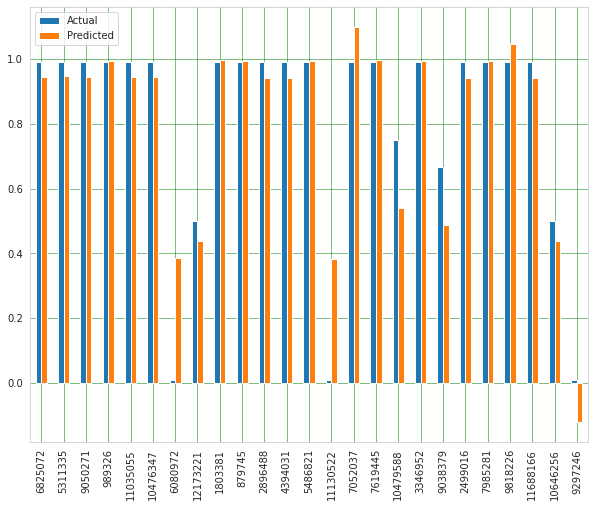

In [92]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [93]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08118491428178458
Mean Squared Error: 0.018073089356522774
Root Mean Squared Error: 0.1344361906501474


In [94]:
h_pred_ln = ((-1)*x_test["delta_days"]/np.log(y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [95]:
h_pred_ln.head()

6825072     160.891088
5311335      15.761923
9050271      20.038359
989326        0.895523
11035055      0.589466
Name: delta_days, dtype: float64

In [96]:
h_test.head()

6825072     121.000000
5311335      85.190400
9050271     115.799060
989326        0.570047
11035055      3.398403
Name: half_life, dtype: float64

In [97]:
from sklearn.linear_model import SGDRegressor

In [98]:
clf_ = SGDRegressor()
clf_.fit(x_train_clean, y_train)

SGDRegressor()

In [99]:
joblib.dump(clf_, 'model_clf.pkl')

['model_clf.pkl']

In [100]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, clf_.predict(x_test_clean))) 
print('Mean Squared Error :', metrics.mean_squared_error(y_test, clf_.predict(x_test_clean)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, clf_.predict(x_test_clean))))

Mean Absolute Error : 0.08177233457438118
Mean Squared Error : 0.018100669142128996
Root Mean Squared Error: 0.1345387272948908


## SVM

In [101]:
#mae vs rmse (fitting)

In [102]:
#lgbn, nn, imbalanc learning

In [103]:
#kenapa predik h pake 2^delta.x, bukan h = - delta/ln(predik p)

In [104]:
#featurenya gimana, masalahnya apaaan aja, 

In [105]:
#https://en.wikipedia.org/wiki/Knowledge_space

## LGBM



In [106]:
import lightgbm as lgb

In [107]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(x_train_clean, y_train)
lgb_eval = lgb.Dataset(x_test_clean, y_test, reference=lgb_train)

In [108]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [109]:
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=50,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

Starting training...
[1]	valid_0's l2: 0.0623984	valid_0's l1: 0.160255
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0563165	valid_0's l1: 0.152248
[3]	valid_0's l2: 0.0508275	valid_0's l1: 0.144646
[4]	valid_0's l2: 0.0458736	valid_0's l1: 0.137419
[5]	valid_0's l2: 0.0414026	valid_0's l1: 0.130555
[6]	valid_0's l2: 0.0373675	valid_0's l1: 0.124037
[7]	valid_0's l2: 0.0337257	valid_0's l1: 0.117842
[8]	valid_0's l2: 0.030439	valid_0's l1: 0.111959
[9]	valid_0's l2: 0.0274728	valid_0's l1: 0.106369
[10]	valid_0's l2: 0.0247956	valid_0's l1: 0.101057
[11]	valid_0's l2: 0.0223795	valid_0's l1: 0.0960129
[12]	valid_0's l2: 0.0201988	valid_0's l1: 0.0912192
[13]	valid_0's l2: 0.0182306	valid_0's l1: 0.0866657
[14]	valid_0's l2: 0.0164543	valid_0's l1: 0.0823382
[15]	valid_0's l2: 0.0164289	valid_0's l1: 0.0823257
[16]	valid_0's l2: 0.0148284	valid_0's l1: 0.0782172
[17]	valid_0's l2: 0.0133838	valid_0's l1: 0.0743107
[18]	valid_0's l2: 0.0120801	valid_0'

In [110]:
print('Saving model...')
# save model to file
gbm.save_model('model_lgbm.txt')
joblib.dump(gbm, 'model_lgbm.pkl')

Saving model...


['model_lgbm.pkl']

In [111]:
print('Starting predicting...')
# predict
y_pred_lgbm = gbm.predict(x_test_clean, num_iteration=gbm.best_iteration)

Starting predicting...


In [112]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lgbm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lgbm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbm)))

Mean Absolute Error: 0.020029177688141487
Mean Squared Error: 0.0008815227044097838
Root Mean Squared Error: 0.029690448033160156


In [113]:
aaa = np.round(y_pred_lgbm, 3)

In [114]:
aaa

array([0.977, 0.977, 0.978, ..., 0.978, 0.98 , 0.979])

In [115]:
h_pred_lgbm_ln = ((-1)*x_test["delta_days"]/np.log(y_pred_lgbm))

In [116]:
h_pred_lgbm_ln_aaa = ((-1)*x_test["delta_days"]/np.log(aaa))

In [117]:
print('Mean Absolute Error:', metrics.mean_absolute_error(h_test, aaa))  
print('Mean Squared Error:', metrics.mean_squared_error(h_test, aaa))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(h_test, aaa)))

Mean Absolute Error: 49.69386554537849
Mean Squared Error: 5557.559941881553
Root Mean Squared Error: 74.54904386966712


### gridsearchcv

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
print('Starting training...')
# train
gbm = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)

gbm.fit(x_train_clean, y_train,
        eval_set=[(x_test_clean, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

Starting training...
[1]	valid_0's l1: 0.160255	valid_0's l2: 0.0623984
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.152248	valid_0's l2: 0.0563165
[3]	valid_0's l1: 0.144646	valid_0's l2: 0.0508275
[4]	valid_0's l1: 0.137419	valid_0's l2: 0.0458735
[5]	valid_0's l1: 0.130555	valid_0's l2: 0.0414026
[6]	valid_0's l1: 0.124037	valid_0's l2: 0.0373676
[7]	valid_0's l1: 0.117842	valid_0's l2: 0.0337257
[8]	valid_0's l1: 0.111958	valid_0's l2: 0.030439
[9]	valid_0's l1: 0.106368	valid_0's l2: 0.0274727
[10]	valid_0's l1: 0.101057	valid_0's l2: 0.0247955
[11]	valid_0's l1: 0.0960127	valid_0's l2: 0.0223794
[12]	valid_0's l1: 0.0912189	valid_0's l2: 0.0201987
[13]	valid_0's l1: 0.0866655	valid_0's l2: 0.0182306
[14]	valid_0's l1: 0.0823378	valid_0's l2: 0.0164542
[15]	valid_0's l1: 0.0782286	valid_0's l2: 0.0148512
[16]	valid_0's l1: 0.0743227	valid_0's l2: 0.0134043
[17]	valid_0's l1: 0.0706164	valid_0's l2: 0.0120985
[18]	valid_0's l1: 0.0670893	valid_0'

LGBMRegressor(learning_rate=0.05, n_estimators=20)

In [120]:
print('Starting predicting...')
# predict
y_pred_lgbm_sklearn = gbm.predict(x_test_clean, num_iteration=gbm.best_iteration_)

Starting predicting...


In [121]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lgbm_sklearn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lgbm_sklearn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbm_sklearn)))

Mean Absolute Error: 0.06056124899872819
Mean Squared Error: 0.008896071337913605
Root Mean Squared Error: 0.09431898715483328


In [122]:
# feature importances
print('Feature importances:', list(gbm.feature_importances_))

Feature importances: [0, 0, 0, 388, 212, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [123]:
def rmsle(y_true, y_pred_lgbm_sklearn):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_pred_lgbm_sklearn) - np.log1p(y_true), 2))), False

In [124]:
print('Starting training with custom eval function...')
# train
gbm.fit(x_train_clean, y_train,
        eval_set=[(x_test_clean, y_test)],
        eval_metric=rmsle,
        early_stopping_rounds=5)

Starting training with custom eval function...
[1]	valid_0's l2: 0.0623984	valid_0's RMSLE: 0.171158
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0563165	valid_0's RMSLE: 0.164394
[3]	valid_0's l2: 0.0508275	valid_0's RMSLE: 0.157846
[4]	valid_0's l2: 0.0458735	valid_0's RMSLE: 0.151512
[5]	valid_0's l2: 0.0414026	valid_0's RMSLE: 0.145386
[6]	valid_0's l2: 0.0373676	valid_0's RMSLE: 0.139464
[7]	valid_0's l2: 0.0337257	valid_0's RMSLE: 0.133742
[8]	valid_0's l2: 0.030439	valid_0's RMSLE: 0.128216
[9]	valid_0's l2: 0.0274727	valid_0's RMSLE: 0.122882
[10]	valid_0's l2: 0.0247955	valid_0's RMSLE: 0.117735
[11]	valid_0's l2: 0.0223794	valid_0's RMSLE: 0.112771
[12]	valid_0's l2: 0.0201987	valid_0's RMSLE: 0.107985
[13]	valid_0's l2: 0.0182306	valid_0's RMSLE: 0.103374
[14]	valid_0's l2: 0.0164542	valid_0's RMSLE: 0.0989328
[15]	valid_0's l2: 0.0148512	valid_0's RMSLE: 0.0946572
[16]	valid_0's l2: 0.0134043	valid_0's RMSLE: 0.0905426
[17]	valid_0's l2: 

LGBMRegressor(learning_rate=0.05, n_estimators=20)

In [125]:
def rae(y_true, y_pred_lgbm_sklearn):
    return 'RAE', np.sum(np.abs(y_pred_lgbm_sklearn - y_true)) / np.sum(np.abs(np.mean(y_true) - y_true)), False

In [126]:
print('Starting training with multiple custom eval functions...')
# train
gbm.fit(x_train_clean, y_train,
        eval_set=[(x_test_clean, y_test)],
        eval_metric=lambda y_true, y_pred_lgbm_sklearn: [rmsle(y_true, y_pred_lgbm_sklearn), rae(y_true, y_pred_lgbm_sklearn)],
        early_stopping_rounds=5)

Starting training with multiple custom eval functions...
[1]	valid_0's l2: 0.0623984	valid_0's RMSLE: 0.171158	valid_0's RAE: 0.951105
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 0.0563165	valid_0's RMSLE: 0.164394	valid_0's RAE: 0.903581
[3]	valid_0's l2: 0.0508275	valid_0's RMSLE: 0.157846	valid_0's RAE: 0.858467
[4]	valid_0's l2: 0.0458735	valid_0's RMSLE: 0.151512	valid_0's RAE: 0.815574
[5]	valid_0's l2: 0.0414026	valid_0's RMSLE: 0.145386	valid_0's RAE: 0.77484
[6]	valid_0's l2: 0.0373676	valid_0's RMSLE: 0.139464	valid_0's RAE: 0.736152
[7]	valid_0's l2: 0.0337257	valid_0's RMSLE: 0.133742	valid_0's RAE: 0.699389
[8]	valid_0's l2: 0.030439	valid_0's RMSLE: 0.128216	valid_0's RAE: 0.664463
[9]	valid_0's l2: 0.0274727	valid_0's RMSLE: 0.122882	valid_0's RAE: 0.631291
[10]	valid_0's l2: 0.0247955	valid_0's RMSLE: 0.117735	valid_0's RAE: 0.599769
[11]	valid_0's l2: 0.0223794	valid_0's RMSLE: 0.112771	valid_0's RAE: 0.56983
[12]	valid_0's l2: 0.0201

LGBMRegressor(learning_rate=0.05, n_estimators=20)

In [127]:
print('Starting predicting...')
# predict
y_pred = gbm.predict(x_test_clean, num_iteration=gbm.best_iteration_)
# eval
print('The rmsle of prediction is:', rmsle(y_test, y_pred_lgbm_sklearn)[1])
print('The rae of prediction is:', rae(y_test, y_pred_lgbm_sklearn)[1])

Starting predicting...
The rmsle of prediction is: 0.07560896674726304
The rae of prediction is: 0.3594279081560239


In [128]:
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.1, 1, 10],
    'n_estimators': [20, 40]
}

gbm = GridSearchCV(estimator, param_grid, cv=3)
gbm.fit(x_train_clean, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)

Best parameters found by grid search are: {'learning_rate': 1, 'n_estimators': 20}


In [129]:
print('Starting training...')
# train
gbm = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate= 1,
                        n_estimators=20)

gbm.fit(x_train_clean, y_train,
        eval_set=[(x_test_clean, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

Starting training...
[1]	valid_0's l1: 0.000317789	valid_0's l2: 1.86091e-05
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.000144923	valid_0's l2: 6.36875e-06
[3]	valid_0's l1: 0.000102814	valid_0's l2: 3.2472e-06
[4]	valid_0's l1: 7.78625e-05	valid_0's l2: 2.23113e-06
[5]	valid_0's l1: 4.76835e-05	valid_0's l2: 1.5338e-06
[6]	valid_0's l1: 5.51331e-06	valid_0's l2: 1.87646e-07
[7]	valid_0's l1: 5.44402e-06	valid_0's l2: 1.88685e-07
[8]	valid_0's l1: 5.0981e-06	valid_0's l2: 1.82475e-07
[9]	valid_0's l1: 4.90117e-06	valid_0's l2: 1.72099e-07
[10]	valid_0's l1: 4.93839e-06	valid_0's l2: 1.74033e-07
[11]	valid_0's l1: 4.94247e-06	valid_0's l2: 1.7573e-07
[12]	valid_0's l1: 4.95215e-06	valid_0's l2: 1.76191e-07
[13]	valid_0's l1: 5.00676e-06	valid_0's l2: 1.76685e-07
[14]	valid_0's l1: 5.01408e-06	valid_0's l2: 1.76938e-07
Early stopping, best iteration is:
[9]	valid_0's l1: 4.90117e-06	valid_0's l2: 1.72099e-07


LGBMRegressor(learning_rate=1, n_estimators=20)

In [130]:
print('Starting predicting...')
# predict
y_pred_lgbm_sklearn = gbm.predict(x_test_clean, num_iteration=gbm.best_iteration_)

Starting predicting...


In [131]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lgbm_sklearn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lgbm_sklearn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbm_sklearn)))

Mean Absolute Error: 4.892797915176787e-06
Mean Squared Error: 1.7209868224058223e-07
Root Mean Squared Error: 0.00041484778201236923


## NN

In [132]:
multi_train = pd.concat([y_train, h_train], axis=1)
multi_test = pd.concat([y_test, h_test], axis=1)

In [133]:
multi_train.head()

,p_recall,half_life
5209146,0.01,0.419097
12391706,0.99,12.845065
8938738,0.99,3.690912
5457519,0.99,97.831630
10650847,0.99,121.000000


In [134]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor

In [135]:
x_train_clean.shape

(3724731, 19)

In [136]:
# Model
model = Sequential()
model.add(Dense(21, input_dim=x_test_clean.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(15, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal'))

In [137]:
model.compile(loss='mean_squared_error', 
              optimizer='adam',)


monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', restore_best_weights=True)


model.fit(x_train_clean,multi_train,validation_data=(x_test_clean,multi_test),callbacks=[monitor],verbose=2,epochs=10)

Epoch 1/10
116398/116398 - 283s - loss: 298.3730 - val_loss: 1.5162 - 283s/epoch - 2ms/step
Epoch 2/10
116398/116398 - 280s - loss: 2.6579 - val_loss: 3.7195 - 280s/epoch - 2ms/step
Epoch 3/10
116398/116398 - 310s - loss: 1.5273 - val_loss: 0.1697 - 310s/epoch - 3ms/step
Epoch 4/10
116398/116398 - 282s - loss: 1.1264 - val_loss: 0.1529 - 282s/epoch - 2ms/step
Epoch 5/10
116398/116398 - 282s - loss: 0.9282 - val_loss: 0.0980 - 282s/epoch - 2ms/step
Epoch 6/10
116398/116398 - 281s - loss: 0.7862 - val_loss: 0.1175 - 281s/epoch - 2ms/step
Epoch 7/10
116398/116398 - 311s - loss: 0.6691 - val_loss: 0.9625 - 311s/epoch - 3ms/step
Epoch 8/10
116398/116398 - 309s - loss: 0.6307 - val_loss: 0.1375 - 309s/epoch - 3ms/step
Epoch 9/10
116398/116398 - 310s - loss: 0.5791 - val_loss: 0.0592 - 310s/epoch - 3ms/step
Epoch 10/10
116398/116398 - 307s - loss: 0.5224 - val_loss: 0.0471 - 307s/epoch - 3ms/step


In [138]:
print('Saving model...')
# save model to file
joblib.dump(model, 'model_nn_2.pkl')

Saving model...
INFO:tensorflow:Assets written to: ram://0d221bf1-16b9-4c05-a39f-50f1644ed559/assets


['model_nn_2.pkl']

In [139]:
nn_pred = model.predict(x_test_clean)

In [140]:
print('Mean Absolute Error:', metrics.mean_absolute_error(multi_test, nn_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(multi_test, nn_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(multi_test, nn_pred)))

Mean Absolute Error: 0.07754981967308879
Mean Squared Error: 0.047105765152888994
Root Mean Squared Error: 0.21703862594683232


In [141]:
nn_pred

array([[  1.0117699 , 121.048294  ],
       [  0.93707967,  85.140854  ],
       [  1.0014042 , 115.68124   ],
       ...,
       [  1.0133723 , 121.04181   ],
       [  0.9795422 ,   0.7908491 ],
       [  0.98629385,   2.1388683 ]], dtype=float32)

In [142]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

NameError: ignored

In [ ]:
type(nn_pred)

In [143]:
nn_pred_dataframe = pd.DataFrame({'p_recall': nn_pred[:, 0], 'half_life': nn_pred[:, 1]})

In [144]:
nn_pred_dataframe.to_csv("nn_pred.csv", encoding='utf-8', index=False)

In [145]:
nn_pred_dataframe.head()

,p_recall,half_life
0,1.011770,121.048294
1,0.937080,85.140854
2,1.001404,115.681236
3,0.979774,0.739783
4,0.996199,3.574614


In [146]:
multi_test.head()

,p_recall,half_life
6825072,0.99,121.000000
5311335,0.99,85.190400
9050271,0.99,115.799060
989326,0.99,0.570047
11035055,0.99,3.398403


In [147]:
print('Mean Absolute Error:', metrics.mean_absolute_error(multi_test.p_recall, nn_pred[:, 0]))  
print('Mean Squared Error:', metrics.mean_squared_error(multi_test.p_recall, nn_pred[:, 0]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(multi_test.p_recall, nn_pred[:, 0])))

Mean Absolute Error: 0.028459324909277616
Mean Squared Error: 0.002795960119758101
Root Mean Squared Error: 0.052876839161944064


In [148]:
print('Mean Absolute Error:', metrics.mean_absolute_error(multi_test.half_life, nn_pred[:, 1]))  
print('Mean Squared Error:', metrics.mean_squared_error(multi_test.half_life, nn_pred[:, 1]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(multi_test.half_life, nn_pred[:, 1])))

Mean Absolute Error: 0.12664031443680035
Mean Squared Error: 0.09141557018602098
Root Mean Squared Error: 0.3023500788589627


In [149]:
x_test.head()

,delta_days,ui_language,lexeme_string,history_seen,history_correct,session_seen,session_correct
6825072,9.208889,es,two/two<num><sp>,4,4,1,1
5311335,0.856192,it,is/be<vbser><pri><p3><sg>,76,69,1,1
9050271,1.163819,es,us/prpers<prn><obj><p1><mf><pl>,53,42,1,1
989326,0.005729,pt,eats/eat<vblex><pri><p3><sg>,81,67,2,2
11035055,0.034155,pt,bread/bread<n><sg>,5,5,1,1


# LAST GRAPH

In [150]:
data_lg = data.loc[(data.learning_language=="en")]

In [151]:
data_lg.p_recall.replace([0, 1], [0.01, 0.99], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [152]:
data_lg.loc[(data_lg.p_recall == 1)]

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct


In [153]:
data_lg.insert(2, "delta_days",data_lg["delta"]/DAY_SECONDS, True )
data_lg = data_lg.drop("delta", axis=1)
data_lg.insert(2, "half_life",((-1)*data_lg["delta_days"]/np.log(data_lg["p_recall"])), True )

In [154]:
data_lg.head()

,p_recall,timestamp,half_life,delta_days,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
87,0.99,1362082504,0.411125,0.004132,u:dwbJ,en,pt,1052c3ace653dbc8923eaa183bc02b88,definition/definition<n><sg>,17,17,2,2
88,0.99,1362082504,0.411125,0.004132,u:dwbJ,en,pt,9cba1b30f88bf3c047b22cffcaf88c12,surface/surface<n><sg>,19,19,3,3
89,0.99,1362082504,0.411125,0.004132,u:dwbJ,en,pt,961cd149f20f2571419b1412d849f19a,scale/scale<n><sg>,21,20,3,3
90,0.80,1362082504,0.018517,0.004132,u:dwbJ,en,pt,5cbb1249562e95794a4c4ae0e2d8ae26,temperature/temperature<n><sg>,44,36,5,4
91,0.99,1362082504,0.411125,0.004132,u:dwbJ,en,pt,2df65bdf80d10d2b78d62cb2e0a731d8,distance/distance<n><sg>,21,20,3,3


In [155]:
data_lg.groupby(["user_id", "lexeme_string"]).size()

user_id  lexeme_string                     
u:-AA    '/'<apos>                             4
         's/'s<gen>                            4
         boy/boy<n><sg>                        2
         breakfast/breakfast<n><sg>            1
         cat/cat<n><sg>                        2
                                              ..
u:zwG    sugar/sugar<n><sg>                    1
         taste/taste<n><sg>                    1
         they/prpers<prn><subj><p3><mf><pl>    1
         tomato/tomato<n><sg>                  1
         wine/wine<n><sg>                      2
Length: 2066616, dtype: int64

In [156]:
data_lg.groupby(['lexeme_string',"user_id"]).size()

lexeme_string     user_id
'/'<apos>         u:-AA      4
                  u:-DF      1
                  u:-b       1
                  u:21Q      1
                  u:3Y_      2
                            ..
zone/zone<n><sg>  u:mYe      1
                  u:mlj      1
                  u:oMO      3
                  u:obm      1
                  u:q5f      2
Length: 2066616, dtype: int64

In [157]:
#cust_counts = data['user_id'].value_counts()
#cust_list = cust_counts[cust_counts < 20].index.tolist()
#data_cari = data[data['user_id'].isin(cust_list)]

In [158]:
data_graph = data_lg.loc[(data_lg.user_id == "u:IY_") & (data_lg.lexeme_string == "'/'<apos>")]

In [159]:
data_graph

,p_recall,timestamp,half_life,delta_days,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
3412572,0.99,1362353833,325.163033,3.267998,u:IY_,en,es,d3619a3e50c3b522703d66166855d3bf,'/'<apos>,124,87,1,1
4411682,0.99,1362434941,93.405990,0.938762,u:IY_,en,es,d3619a3e50c3b522703d66166855d3bf,'/'<apos>,125,88,1,1
5102883,0.01,1362494683,0.150148,0.691458,u:IY_,en,es,d3619a3e50c3b522703d66166855d3bf,'/'<apos>,126,89,1,0
6416961,0.50,1362590873,1.606184,1.113322,u:IY_,en,es,d3619a3e50c3b522703d66166855d3bf,'/'<apos>,127,89,2,1
7506071,0.99,1362671791,93.186033,0.936551,u:IY_,en,es,d3619a3e50c3b522703d66166855d3bf,'/'<apos>,129,90,1,1
9223660,0.50,1362796929,2.089537,1.448356,u:IY_,en,es,d3619a3e50c3b522703d66166855d3bf,'/'<apos>,130,91,2,1
9948375,0.50,1362865581,1.146341,0.794583,u:IY_,en,es,d3619a3e50c3b522703d66166855d3bf,'/'<apos>,132,92,2,1
10806860,0.99,1362942517,88.600319,0.890463,u:IY_,en,es,d3619a3e50c3b522703d66166855d3bf,'/'<apos>,134,93,1,1
12683034,0.99,1363092030,172.180767,1.730475,u:IY_,en,es,d3619a3e50c3b522703d66166855d3bf,'/'<apos>,135,94,1,1


In [160]:
from datetime import datetime

In [161]:
data_graph_del = data_graph.drop(["user_id","learning_language", "timestamp", "lexeme_id", "p_recall", "half_life"], axis=1)

In [162]:
gg = preprocessTest(data_graph_del, num, cat, standardizer)

In [163]:
gg

,delta_days,history_seen,history_correct,session_seen,session_correct,ui_language_0,ui_language_1,lexeme_string_0,lexeme_string_1,lexeme_string_2,lexeme_string_3,lexeme_string_4,lexeme_string_5,lexeme_string_6,lexeme_string_7,lexeme_string_8,lexeme_string_9,lexeme_string_10,lexeme_string_11
3412572,-0.194489,0.443043,0.327864,-0.594508,-0.489931,0,1,0,0,0,0,1,1,1,0,0,0,0,1
4411682,-0.297391,0.448000,0.333625,-0.594508,-0.489931,0,1,0,0,0,0,1,1,1,0,0,0,0,1
5102883,-0.308316,0.452957,0.339386,-0.594508,-1.215952,0,1,0,0,0,0,1,1,1,0,0,0,0,1
6416961,-0.289679,0.457915,0.339386,0.103957,-0.489931,0,1,0,0,0,0,1,1,1,0,0,0,0,1
7506071,-0.297489,0.467830,0.345147,-0.594508,-0.489931,0,1,0,0,0,0,1,1,1,0,0,0,0,1
9223660,-0.274878,0.472787,0.350908,0.103957,-0.489931,0,1,0,0,0,0,1,1,1,0,0,0,0,1
9948375,-0.303761,0.482702,0.356669,0.103957,-0.489931,0,1,0,0,0,0,1,1,1,0,0,0,0,1
10806860,-0.299525,0.492617,0.362429,-0.594508,-0.489931,0,1,0,0,0,0,1,1,1,0,0,0,0,1
12683034,-0.262414,0.497574,0.368190,-0.594508,-0.489931,0,1,0,0,0,0,1,1,1,0,0,0,0,1


In [164]:
nn_pred_graph = model.predict(gg)

In [165]:
nn_pred_graph

array([[1.0122565e+00, 1.2098229e+02],
       [9.5460302e-01, 9.3449852e+01],
       [6.2125027e-03, 4.7451675e-02],
       [6.5736657e-01, 2.0561919e+00],
       [9.5414335e-01, 9.3231544e+01],
       [6.6214925e-01, 2.1011107e+00],
       [6.7686403e-01, 9.2959547e-01],
       [9.4452840e-01, 8.8661827e+01],
       [1.0122947e+00, 1.2093417e+02]], dtype=float32)

In [166]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data_graph.p_recall, nn_pred_graph[:, 0]))  
print('Mean Squared Error:', metrics.mean_squared_error(data_graph.p_recall, nn_pred_graph[:, 0]))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data_graph.p_recall, nn_pred_graph[:, 0])))

Mean Absolute Error: 0.07349374890327454
Mean Squared Error: 0.009772284814471515
Root Mean Squared Error: 0.0988548674293356


In [167]:
linreg_pred_graph = linreg.predict(gg)

In [168]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data_graph.p_recall, linreg_pred_graph))  
print('Mean Squared Error:', metrics.mean_squared_error(data_graph.p_recall, linreg_pred_graph))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data_graph.p_recall, linreg_pred_graph)))

Mean Absolute Error: 0.08906950774173869
Mean Squared Error: 0.018168502742415202
Root Mean Squared Error: 0.13479058847862932


In [169]:
linreg_pred_graph

array([0.94268101, 0.94273859, 0.38446268, 0.43658752, 0.94265546,
       0.43653735, 0.43651199, 0.94257316, 0.94255204])